In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Final Mean Squared Error: 0.9924386487246482


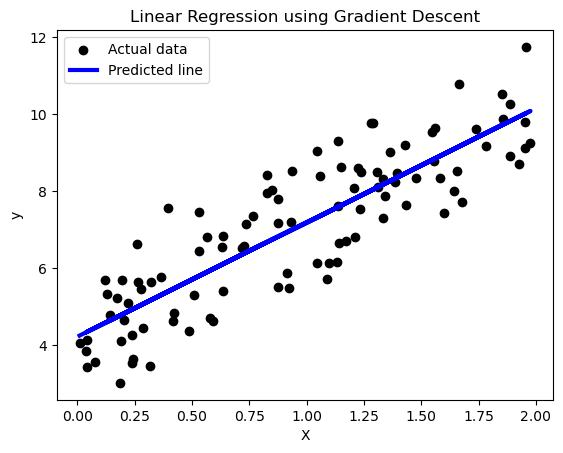

Text(0.5, 1.0, 'MSE History during Gradient Descent')

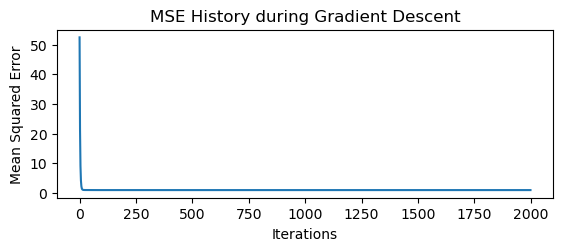

In [2]:
# prepare our data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)   # generate a random values between 0 and 3
y = 4 +(3*X) + np.random.randn(100, 1) # y=wx+b, and add random noise  

X_b = np.c_[np.ones((100, 1)), X]  # Adding a bias column with value 1 to X 

# Gradient Descent implementation
def compute_mse(X, y, theta):
    #MSE=(1/m)*∑(h(x)−y)**2
    m = len(y)
    pred = X.dot(theta)
    error = pred - y
    mse = (1/m) * np.sum(error**2)
    return mse

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    mse_all_time = []

    for i in range(iterations):
        pred= X.dot(theta)
        error = pred - y
        # Compute the gradient : J(θ0,θ1)=(1/2m)*∑(h(x)−y)**2
        gradients = (1/m) * X.T.dot(error)
        theta = theta - learning_rate * gradients # θnew = θ − learning_rate × gradients
        mse = compute_mse(X, y, theta)
        mse_all_time.append(mse)
        
    return theta, mse_all_time

# Set parameters
learning_rate = 0.1
iterations = 2000
initial_theta = np.random.randn(2, 1) #(bias and weight).

# Run Gradient Descent
theta, mse_all_time = gradient_descent(X_b, y, initial_theta, learning_rate, iterations)

# Make predictions using the learned model
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias 
    return X_b.dot(theta)

# Predict and evaluate
y_pred = predict(X, theta)

# Calculate final Mean Squared Error
final_mse = compute_mse(X_b, y, theta)

print(f"Final Mean Squared Error: {final_mse}")

# Plot the results
plt.scatter(X, y, color='black', label='Actual data')
plt.plot(X, y_pred, color='blue', linewidth=3, label='Predicted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()

# Plot the MSE history
plt.subplot(2, 1, 2)
plt.plot(mse_all_time)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE History during Gradient Descent')